In [1]:
import os
import zipfile
 
local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [2]:
dry_dir = os.path.join('/content/trainskin/dry')
normal_dir = os.path.join('/content/trainskin/normal')
oily_dir = os.path.join('/content/trainskin/oily')
sensitif_dir = os.path.join('/content/trainskin/sensitif')
kombinasi_dir = os.path.join('/content/trainskin/kombinasi')


print('total training dry images:', len(os.listdir(dry_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training oily images:', len(os.listdir(oily_dir)))
print('total training sensitif images:', len(os.listdir(sensitif_dir)))
print('total training kombinasi images:', len(os.listdir(kombinasi_dir)))

dry_files = os.listdir(dry_dir)
print(dry_files)

normal_files = os.listdir(normal_dir)
print(normal_files)

oily_files = os.listdir(oily_dir)
print(oily_files)

sensitif_files = os.listdir(sensitif_dir)
print(sensitif_files)

kombinasi_files = os.listdir(kombinasi_dir)
print(kombinasi_files)

total training dry images: 15
total training normal images: 15
total training oily images: 15
total training sensitif images: 15
total training kombinasi images: 15
['dry.8.PNG', 'dry.2.PNG', 'dry.15.PNG', 'dry.13.PNG', 'dry.4.PNG', 'dry.5.PNG', 'dry.10.PNG', 'dry.12.PNG', 'dry.6.PNG', 'dry.14.PNG', 'dry.9.PNG', 'dry.7.PNG', 'dry.11.PNG', 'dry.3.PNG', 'dry.1.PNG']
['normal.13.PNG', 'normal.14.PNG', 'normal.9.PNG', 'normal.2.PNG', 'normal.6.PNG', 'normal.3.PNG', 'normal.7.PNG', 'normal.11.PNG', 'normal.4.PNG', 'normal.10.PNG', 'normal.12.PNG', 'normal.5.PNG', 'normal.15.PNG', 'normal.8.PNG', 'normal.1.PNG']
['oily.7.PNG', 'oily.11.PNG', 'oily.8.PNG', 'oily.1.PNG', 'oily.3.PNG', 'oily.13.PNG', 'oily.6.PNG', 'oily.9.PNG', 'oily.5.PNG', 'oily.10.PNG', 'oily.14.PNG', 'oily.2.PNG', 'oily.15.PNG', 'oily.12.PNG', 'oily.4.PNG']
['sensitif.18.PNG', 'sensitif.19.PNG', 'sensitif.8.PNG', 'sensitif.7.PNG', 'sensitif.15.PNG', 'sensitif.20.PNG', 'sensitif.9.PNG', 'sensitif.10.PNG', 'sensitif.13.PNG', 

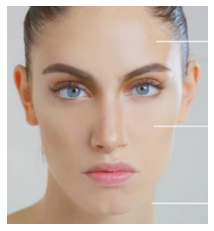

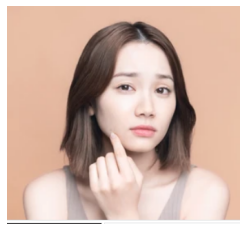

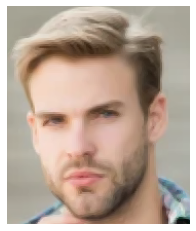

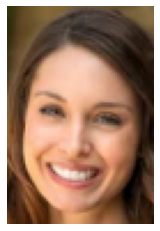

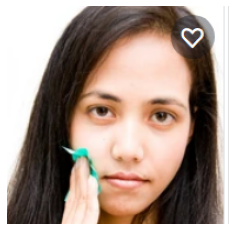

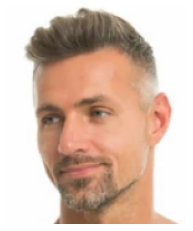

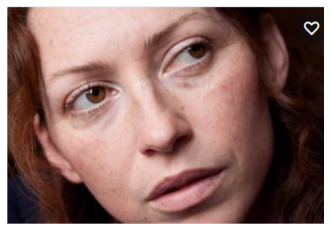

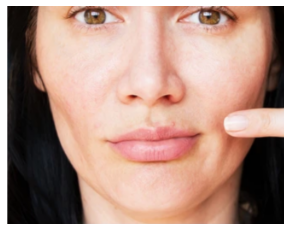

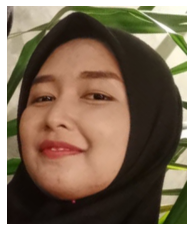

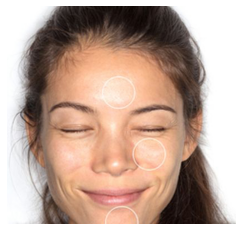

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dry = [os.path.join(dry_dir, fname) 
                for fname in dry_files[pic_index-2:pic_index]]
next_normal = [os.path.join(normal_dir, fname) 
                for fname in normal_files[pic_index-2:pic_index]]
next_oily = [os.path.join(oily_dir, fname) 
                for fname in oily_files[pic_index-2:pic_index]]
next_sensitif = [os.path.join(sensitif_dir, fname) 
                for fname in sensitif_files[pic_index-2:pic_index]]
next_kombinasi = [os.path.join(kombinasi_dir, fname) 
                for fname in kombinasi_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dry+next_normal+next_oily+next_sensitif+next_kombinasi):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.6) and (logs.get('val_accuracy')>=0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
TRAINING_DIR = "/content/trainskin/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/testskin/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(96, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(72, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=100, validation_data = validation_generator, verbose = 2, validation_steps=2,callbacks=[callbacks])

model.save("skincare.h5")

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
__________________________________________

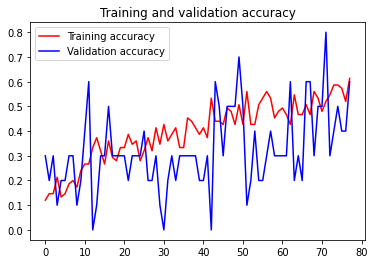

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

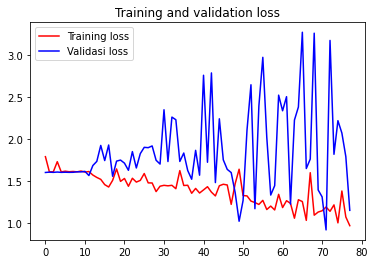

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validasi loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes.argmax())
  print(fn)
  print(classes)

Saving oily.20.PNG to oily.20.PNG
3
oily.20.PNG
[[0. 0. 0. 1. 0.]]
